In [1]:
import pandas as pd
import os
import random
import numpy as np
from sklearn.model_selection import train_test_split
#os.listdir lists all files in the given directry
files=os.listdir("Artifacts Tagged files")

In [2]:
dfs = [pd.read_csv('Artifacts Tagged files/'+fp,names=['amplitude','value'])[250:] for fp in files]
#concat funtion joins all files in dfs and make a large df(data frame)
df = pd.concat(dfs)
#reset_index resets the index from 1 2 3....7 8 1 2 3     to         1 2 3 ... 7 8 9 10 11
df=df.reset_index(drop=True)

In [3]:
arr=[]
#loop
while(True):
    #find first non 0 value
    start=df.value.ne(0).idxmax()
    #end condition
    if(start==0):
        break
    # create a temp variable to store df excluding starting zeros
    temp=df.iloc[start:]
    #from temp finding first zero
    end=temp[temp.value==0].first_valid_index()-1
    #a contains the latest chunk of labled data
    a=df.iloc[start:end]
    a=a.reset_index(drop=True)
    #appending a to arr
    arr.append([a.amplitude.tolist(),a.value[0]])
    #truncate the original df to first found chunk
    df=df.iloc[end+1:]
    df=df.reset_index(drop=True)

In [4]:
arr=np.array(arr)
arr.shape

(338, 2)

In [5]:
data_points=arr.shape[0]
print(data_points)

338


In [6]:
realEEG=[]
for i in range(1,7):
    realEEG.append(arr[-i])
realEEG=np.array(realEEG)

realEEG.shape

(6, 2)

In [7]:
arr=arr[0:data_points-6]

In [8]:
for _ in range(6):
    a=realEEG[_]
    temp=[]
    i=0
    l=len(a[0])
    #loop through and append into temp
    while(i<l):
        #generating a random number from 100-400 (size of other files)
        ran=random.randrange(100, 400)
        #corner cases for last left chunks in files
        if(l-i<100):
            #print('d')
            break
        if(l-i<400):
            #print('s')
            temp.append([a[0][i:l],float(79.0)])
            #print(np.array(a[0][i:l]).shape)
            break
        #appending to temp
        #print('a',end=' ')
        #print(np.array(a[0][i:i+ran]).shape)
        temp.append([a[0][i:i+ran],float(79.0)])
        i+=ran
    temp=np.array(temp)
    #print(temp.shape)
    #appending to arr
    arr=np.concatenate((arr,temp))
    #print(arr.shape)

In [9]:
df=pd.DataFrame(arr,columns=['X','Y'])
# Extracting X, Y
X=df.X.values
Y=df.Y

In [10]:
d=[]
data_points=X.shape[0]
for i in range(data_points):
    temp=np.array(X[i])
    #converting string to floats
    temp=temp.astype(np.float)
    
    rows=temp.shape[0]
    #number of valued in each chunk
    #print(rows)
    #reshaping
    temp=temp.reshape(rows,1)
    #appending to d
    d.append(temp)

In [11]:
d=np.array(d)
X=d
X.shape[0]

438

In [12]:
for i in range(X.shape[0]):
    X[i]=X[i]-np.mean(X[i])

In [13]:
df=pd.DataFrame(columns=['min','max','max-min','sd'])
for i in range(X.shape[0]):
    mini=np.min(X[i])
    maxi=np.max(X[i])
    sd=np.std(X[i])
    df = df.append({'min': mini,'max':maxi,'max-min':maxi-mini,'sd':sd}, ignore_index=True)

In [14]:
X=df.values

In [15]:
Y[Y!=79]=1

In [16]:
Y=Y.astype(int)
#train test split test_size is the ratio of test sixe vs total
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
print(y_test.shape)

(145,)


In [17]:
from sklearn.svm import SVC
#defining the classifier
clf = SVC(kernel='linear') 
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9862068965517241

# now loading classification data

In [18]:
temp=pd.read_csv('trimmedData.csv')
X=temp['X']
X=X.values.reshape(-1,1)
Y=temp['Y']

In [19]:
gtemp=temp.groupby('Y')
y=[]
g1=gtemp.get_group(1) 
g2=gtemp.get_group(2)
g32=gtemp.get_group(32)
g37=gtemp.get_group(37)
g38=gtemp.get_group(38)

In [20]:
n_features=1
totaldp=0
window=250

X=g1['X']
data_points=X.shape[0]//window
y=np.append(y,[1]*data_points)
totaldp+=data_points
X=X.head(data_points*window)
X=np.array(X)
X=np.reshape(X,((data_points,window,n_features)))
groupedX=X
X=g2['X']
data_points=X.shape[0]//window
y=np.append(y,[2]*data_points)
totaldp+=data_points
X=X.head(data_points*window)
X=np.array(X)
X=np.reshape(X,((data_points,window,n_features)))
groupedX=np.append(groupedX,X)
X=g32['X']
data_points=X.shape[0]//window
y=np.append(y,[32]*data_points)
totaldp+=data_points
X=X.head(data_points*window)
X=np.array(X)
X=np.reshape(X,((data_points,window,n_features)))
groupedX=np.append(groupedX,X)
X=g37['X']
data_points=X.shape[0]//window
y=np.append(y,[37]*data_points)
totaldp+=data_points
X=X.head(data_points*window)
X=np.array(X)
X=np.reshape(X,((data_points,window,n_features)))
groupedX=np.append(groupedX,X)
X=g38['X']
data_points=X.shape[0]//window
y=np.append(y,[38]*data_points)
totaldp+=data_points
X=X.head(data_points*window)
X=np.array(X)
X=np.reshape(X,((data_points,window,n_features)))
groupedX=np.append(groupedX,X)
groupedX=np.reshape(groupedX,((totaldp,window,n_features)))

In [21]:
for i in range(groupedX.shape[0]):
    groupedX[i]=groupedX[i]-np.mean(groupedX[i])

In [22]:
X=groupedX
#dividing by ratio of ranges between 2 datasets
X/=1.8

In [23]:
a=np.max(X,axis=1)
    #print(a.shape)
    #b=np.min(X,axis=1)
a=np.concatenate((a,np.min(X,axis=1)),axis=1)
a=np.concatenate((a,np.max(X,axis=1)-np.min(X,axis=1)),axis=1)
a=np.concatenate((a,np.std(X,axis=1)),axis=1)

In [24]:
pred=clf.predict(a)

In [35]:
predictedArtifact=np.where(pred==1)[0]
predictedArtifact
#np.savetxt('artifact predicted svm xtreme1.csv',predictedArtifact,delimiter=',')

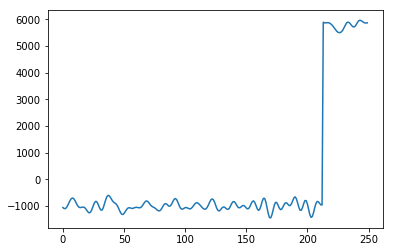

In [34]:
#X[2]
import matplotlib.pyplot as plt
plt.plot(X[2218])

In [27]:
a.shape

(2628, 4)

Sometimes the model learn in such a way that artifact predictions are too
much in number and many non artifacts are also classified. So we need to
choose the divide number properly and examine some files by plotting

# Testing

In [28]:
a[:,2].mean()

822.5172120750888

In [29]:
df['max-min'][332:].mean()

724.0898113207538